In [1]:
from pyDOE import *
import matplotlib.pyplot as plt# Standard imports
import copy
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns 

# Fixing random state for reproducibility
np.random.seed(19680801)

In [2]:
import pickle as pkl

# Study of Robustness:

## Across training regimes

In [3]:
def top_n(list_models, N=10, regime=108, key='kappaCohen_test'):
    
    sorted_by_key = sorted(list_models, key= lambda triplet: triplet[2][regime][key])
    
    top_n_idx = len(sorted_by_key) * N/100
    top_n_idx = round(top_n_idx)
    
    return sorted_by_key[-top_n_idx:]


def top_quantile_n(list_models, N=10, regime=108, key='kappaCohen_test', cifar10=False):
    
    if cifar10:
        sorted_by_key = sorted(list_models, key= lambda triplet: triplet[2][key])
        sorted_values = [val_local[key] for (_, _, val_local) in sorted_by_key] 
    else:
        sorted_by_key = sorted(list_models, key= lambda triplet: triplet[2][regime][key])
        sorted_values = [val_local[regime][key] for (_, _, val_local) in sorted_by_key] 
    
    top_quantile_n_val = np.quantile(sorted_values, q=N/100.0)
    for index_local, val_local in enumerate(sorted_values):
        if val_local > top_quantile_n_val:
            top_quantile_n_idx = index_local
            break;
    #print(top_quantile_n_idx)
    
    return sorted_by_key[-top_quantile_n_idx:]#, top_quantile_n_val

## Plot evolution of Top-N intersection

In [4]:
def Evol_top_N_relatively_4(relative=False):
    size_inter = []
    total_size = 100 #len(mean_perf_half)
    for N in range(1, total_size): # + 1):
        top_25_r_04 = top_quantile_n(mean_perf_half, N=N, regime=4, key='kappaCohen_test')
        top_25_r_12 = top_quantile_n(mean_perf_half, N=N, regime=12, key='kappaCohen_test')
        top_25_r_36 = top_quantile_n(mean_perf_half, N=N, regime=36, key='kappaCohen_test')
        top_25_r_108 = top_quantile_n(mean_perf_half, N=N, regime=108, key='kappaCohen_test')

        top_25_r_4_models = [(m4, o4) for (m4, o4, _) in top_25_r_04]
        top_25_r_12_models = [(m12, o12) for (m12, o12, _) in top_25_r_12]
        top_25_r_36_models = [(m36, o36) for (m36, o36, _) in top_25_r_36]
        top_25_r_108_models = [(m108, o108) for (m108, o108, _) in top_25_r_108]

        cross_4_12 = []
        cross_4_12_36 = []
        cross_all = []

        for duo_i in top_25_r_04:
            # in R = 12 
            for duo_j in top_25_r_12:
                if np.all(duo_i[0] == duo_j[0]) and np.all(duo_i[1] == duo_j[1]) :
                    cross_4_12.append(duo_i)

        for duo_i in cross_4_12:
            # in R = 12 
            for duo_j in top_25_r_36_models:
                if np.all(duo_i[0] == duo_j[0]) and np.all(duo_i[1] == duo_j[1]) :
                    cross_4_12_36.append(duo_i)

        for duo_i in cross_4_12_36:
            # in R = 12 
            for duo_j in top_25_r_108:
                if np.all(duo_i[0] == duo_j[0]) and np.all(duo_i[1] == duo_j[1]) :
                    cross_all.append(duo_i)
        if relative:
            len_top_4 = len(top_25_r_4_models)
            print(len_top_4, N)
            #assert len_top_4 == N
        else:
            len_top_4 = total_size
        
        l0, l1, l2, l3 = len(top_25_r_4_models) / len_top_4, len(cross_4_12)/len_top_4, len(cross_4_12_36)/len_top_4, len(cross_all)/len_top_4
        size_inter.append((l0 * 100, l1 * 100, l2 * 100, l3 * 100))
    return size_inter
  
    
def Evol_bottom_N_relatively_4(relative=False):
    size_inter = []
    total_size = 100 #len(mean_perf_half)
    for N in range(1, total_size): # + 1):
        bottom_25_r_04 = bottom_quantile_n(mean_perf_half, N=N, regime=4, key='kappaCohen_test')
        bottom_25_r_12 = bottom_quantile_n(mean_perf_half, N=N, regime=12, key='kappaCohen_test')
        bottom_25_r_36 = bottom_quantile_n(mean_perf_half, N=N, regime=36, key='kappaCohen_test')
        bottom_25_r_108 = bottom_quantile_n(mean_perf_half, N=N, regime=108, key='kappaCohen_test')

        bottom_25_r_4_models = [(m4, o4) for (m4, o4, _) in bottom_25_r_04]
        bottom_25_r_12_models = [(m12, o12) for (m12, o12, _) in bottom_25_r_12]
        bottom_25_r_36_models = [(m36, o36) for (m36, o36, _) in bottom_25_r_36]
        bottom_25_r_108_models = [(m108, o108) for (m108, o108, _) in bottom_25_r_108]

        cross_4_12 = []
        cross_4_12_36 = []
        cross_all = []

        for duo_i in bottom_25_r_04:
            # in R = 12 
            for duo_j in bottom_25_r_12:
                if np.all(duo_i[0] == duo_j[0]) and np.all(duo_i[1] == duo_j[1]) :
                    cross_4_12.append(duo_i)

        for duo_i in cross_4_12:
            # in R = 12 
            for duo_j in bottom_25_r_36_models:
                if np.all(duo_i[0] == duo_j[0]) and np.all(duo_i[1] == duo_j[1]) :
                    cross_4_12_36.append(duo_i)

        for duo_i in cross_4_12_36:
            # in R = 12 
            for duo_j in bottom_25_r_108:
                if np.all(duo_i[0] == duo_j[0]) and np.all(duo_i[1] == duo_j[1]) :
                    cross_all.append(duo_i)
        if relative:
            len_bottom_4 = len(bottom_25_r_4_models)
            #assert len_bottom_4 == N
        else:
            len_bottom_4 = total_size
        
        l0, l1, l2, l3 = len(bottom_25_r_4_models) / len_bottom_4, len(cross_4_12)/len_bottom_4, len(cross_4_12_36)/len_bottom_4, len(cross_all)/len_bottom_4
        size_inter.append((l0 * 100, l1 * 100, l2 * 100, l3 * 100))
    return size_inter

In [5]:
def bottom_n(list_models, N=10, regime=108, key='kappaCohen_test'):
    
    sorted_by_key = sorted(list_models, key= lambda triplet: triplet[2][regime][key])
    
    bottom_n_idx = len(sorted_by_key) * N/100
    bottom_n_idx = round(bottom_n_idx)
    
    return sorted_by_key[:bottom_n_idx]

def bottom_quantile_n(list_models, N=10, regime=108, key='kappaCohen_test', cifar10=False):
    
    if cifar10:
        sorted_by_key = sorted(list_models, key= lambda triplet: triplet[2][key])
        sorted_values = [val_local[key] for (_, _, val_local) in sorted_by_key] 
    else:
        sorted_by_key = sorted(list_models, key= lambda triplet: triplet[2][regime][key])   
        sorted_values = [val_local[regime][key] for (_, _, val_local) in sorted_by_key] 
    
    bottom_quantile_n_val = np.quantile(sorted_values, q=N/100.0)
    for index_local, val_local in enumerate(sorted_values):
        if val_local > bottom_quantile_n_val:
            bottom_quantile_n_idx = index_local
            break;
    
    return sorted_by_key[:bottom_quantile_n_idx]

## Persistence on CIFAR-10

In [6]:
# Initialize the NASBench object which parses the raw data into memory (this
# should only be run once as it takes up to a few minutes).
from nasbench import api

path_to_nasbench_data_full ='/local_home/trao_ka/data/nasbench_full.tfrecord'
#path_to_nasbench_data_full = '/media/kalifou/SAMSUNG1/DLR_DAAD_Research_Backup/data/nasbench_full.tfrecord'

# Use nasbench_full.tfrecord for full dataset (run download command above).
nasbench = api.NASBench(path_to_nasbench_data_full)
#('/home/kalifou/Documents/dlr/data/nasbench_full.tfrecord')

/local_home/trao_ka/anaconda3/envs/nas_benchmarks/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/local_home/trao_ka/anaconda3/envs/nas_benchmarks/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/local_home/trao_ka/anaconda3/envs/nas_benchmarks/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/




Loading dataset from file... This may take a few minutes...
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


/local_home/trao_ka/anaconda3/envs/nas_benchmarks/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/local_home/trao_ka/anaconda3/envs/nas_benchmarks/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/local_home/trao_ka/anaconda3/envs/nas_benchmarks/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint

Loaded dataset in 161 seconds


In [7]:

# Useful constants
INPUT = 'input'
OUTPUT = 'output'
CONV3X3 = 'conv3x3-bn-relu'
CONV1X1 = 'conv1x1-bn-relu'
MAXPOOL3X3 = 'maxpool3x3'
NUM_VERTICES = 7
MAX_EDGES = 9
EDGE_SPOTS = NUM_VERTICES * (NUM_VERTICES - 1) / 2   # Upper triangular matrix
OP_SPOTS = NUM_VERTICES - 2   # Input/output vertices are fixed
ALLOWED_OPS = [CONV3X3, CONV1X1, MAXPOOL3X3]
ALLOWED_EDGES = [0, 1]   # Binary adjacency matrix

In [8]:
def random_spec():
  """Returns a random valid spec."""
  while True:
    matrix = np.random.choice(ALLOWED_EDGES, size=(NUM_VERTICES, NUM_VERTICES))
    matrix = np.triu(matrix, 1)
    ops = np.random.choice(ALLOWED_OPS, size=(NUM_VERTICES)).tolist()
    ops[0] = INPUT
    ops[-1] = OUTPUT
    spec = api.ModelSpec(matrix=matrix, ops=ops)
    if nasbench.is_valid(spec):
      return matrix, ops, spec

In [9]:
#extra_specs = LHS_sample_N_valid_specs(N_samples, 7, ALLOWED_OPS, nasbench)

In [10]:
N_samples = 1000
extra_specs = list()
for iter in range(N_samples):
    spec = random_spec()
    extra_specs.append(spec)

In [11]:
N_epochs = 4
all_data_4_cf10 = list()
for m, o, cell in extra_specs:
    # Query an Inception-like cell from the dataset.
    cell = api.ModelSpec(
      matrix= m.astype(int),
      # Operations at the vertices of the module, matches order of matrix.
      ops= o) #[INPUT, CONV1X1, CONV3X3, CONV3X3, CONV3X3, MAXPOOL3X3, OUTPUT])

    data = nasbench.query(cell, epochs=N_epochs)
    all_data_4_cf10.append((m, o, data))

In [12]:
N_epochs = 12
all_data_12_cf10 = list()
for m, o, cell in extra_specs:
    # Query an Inception-like cell from the dataset.
    cell = api.ModelSpec(
      matrix= m.astype(int),
      # Operations at the vertices of the module, matches order of matrix.
      ops= o) #[INPUT, CONV1X1, CONV3X3, CONV3X3, CONV3X3, MAXPOOL3X3, OUTPUT])

    data = nasbench.query(cell, epochs=N_epochs)
    all_data_12_cf10.append((m, o, data))

In [13]:
N_epochs = 36
all_data_36_cf10 = list()
for m, o, cell in extra_specs:
    # Query an Inception-like cell from the dataset.
    cell = api.ModelSpec(
      matrix= m.astype(int),
      # Operations at the vertices of the module, matches order of matrix.
      ops= o) #[INPUT, CONV1X1, CONV3X3, CONV3X3, CONV3X3, MAXPOOL3X3, OUTPUT])

    data = nasbench.query(cell, epochs=N_epochs)
    all_data_36_cf10.append((m, o, data))

In [14]:
N_epochs = 108
all_data_108_cf10 = list()
for m, o, cell in extra_specs:
    # Query an Inception-like cell from the dataset.
    cell = api.ModelSpec(
      matrix= m.astype(int),
      # Operations at the vertices of the module, matches order of matrix.
      ops= o) #[INPUT, CONV1X1, CONV3X3, CONV3X3, CONV3X3, MAXPOOL3X3, OUTPUT])

    data = nasbench.query(cell, epochs=N_epochs)
    all_data_108_cf10.append((m, o, data))

# Robustness across regimes : CIFAR-10

## Top-N%: 
### Absolute TOP-N%

In [15]:
top_n_r_04 = top_quantile_n(all_data_36_cf10, N=10, key='test_accuracy', cifar10=True)

In [16]:
model_min12 = top_n_r_04[0]
model_max12 = top_n_r_04[len(top_n_r_04)-1]
#print(len(model_min12), len(model_max12))
min_ri_test_acc12 = min(model_min12[2]['test_accuracy'], model_max12[2]['test_accuracy'])
max_ri_test_acc12 = max(model_min12[2]['test_accuracy'], model_max12[2]['test_accuracy'])

In [17]:
min_ri_test_acc12, max_ri_test_acc12

(0.9128605723381042, 0.9217748641967773)

### Relative TOP-N%

In [18]:
relative = True
size_inter_cifar10_top = []
total_size = N_samples

for N in range(1, 100): #:  + 1):
    #print(N)
    top_n_r_04 = top_quantile_n(all_data_4_cf10, N=N, key='test_accuracy', cifar10=True)
    top_n_r_12 = top_quantile_n(all_data_12_cf10, N=N, key='test_accuracy', cifar10=True)
    top_n_r_36 = top_quantile_n(all_data_36_cf10, N=N, key='test_accuracy', cifar10=True)
    top_n_r_108 = top_quantile_n(all_data_108_cf10, N=N, key='test_accuracy', cifar10=True)

    top_n_r_4_models = [(m4, o4) for (m4, o4, _) in top_n_r_04]

    cross_4_12 = []
    cross_4_12_36 = []
    cross_all = []
    
    model_min12 = top_n_r_12[0]
    model_max12 = top_n_r_12[len(top_n_r_12)-1]
    #print(len(model_min12), len(model_max12))
    min_ri_test_acc12 = min(model_min12[2]['test_accuracy'], model_max12[2]['test_accuracy'])
    max_ri_test_acc12 = max(model_min12[2]['test_accuracy'], model_max12[2]['test_accuracy'])

    for duo_i in top_n_r_04:
        
        cell = api.ModelSpec(
          matrix= duo_i[0],
          # Operations at the vertices of the module, matches order of matrix.
          ops= duo_i[1])
        data = nasbench.query(cell, epochs=12)
        
        if data['test_accuracy'] >= min_ri_test_acc12 and data['test_accuracy'] <= max_ri_test_acc12:
            cross_4_12.append(duo_i)
        
    model_min36 = top_n_r_36[0]
    model_max36 = top_n_r_36[len(top_n_r_36)-1]

    min_ri_test_acc36 = min(model_min36[2]['test_accuracy'], model_max36[2]['test_accuracy'])
    max_ri_test_acc36 = max(model_min36[2]['test_accuracy'], model_max36[2]['test_accuracy'])
        
    for duo_i in cross_4_12:
        
        cell = api.ModelSpec(
          matrix= duo_i[0],
          # Operations at the vertices of the module, matches order of matrix.
          ops= duo_i[1])
        data = nasbench.query(cell, epochs=36)
        
        if data['test_accuracy'] >= min_ri_test_acc36 and data['test_accuracy'] <= max_ri_test_acc36:
            cross_4_12_36.append(duo_i)
            
    model_min108 = top_n_r_108[0]
    model_max108 = top_n_r_108[len(top_n_r_108)-1]

    min_ri_test_acc108 = min(model_min108[2]['test_accuracy'], model_max108[2]['test_accuracy'])
    max_ri_test_acc108 = max(model_min108[2]['test_accuracy'], model_max108[2]['test_accuracy'])
    
    for duo_i in cross_4_12_36:
        
        
        cell = api.ModelSpec(
          matrix= duo_i[0],
          # Operations at the vertices of the module, matches order of matrix.
          ops= duo_i[1])
        data = nasbench.query(cell, epochs=108)
        
        if data['test_accuracy'] >= min_ri_test_acc108 and data['test_accuracy'] <= max_ri_test_acc108:
            cross_all.append(duo_i)
            
    if relative:
        len_top_4 = len(top_n_r_04)       
    else:
        len_top_4 = total_size

    l0, l1, l2, l3 = len(top_n_r_04) / len_top_4, len(cross_4_12)/len_top_4, len(cross_4_12_36)/len_top_4, len(cross_all)/len_top_4
    size_inter_cifar10_top.append((l0 * 100, l1 * 100, l2 * 100, l3 * 100))

    


In [19]:
N_top_size = 25
ref_top_25_c10 = [s[0] for s in size_inter_cifar10_top][:N_top_size]
np.min(ref_top_25_c10), np.max(ref_top_25_c10), np.sum(ref_top_25_c10)/ (100 * N_top_size)

(100.0, 100.0, 1.0)

In [20]:
top_25_c10_list = [s[3] for s in size_inter_cifar10_top][:N_top_size]

top_25_c10 = top_25_c10_list[len(top_25_c10_list)-1]
auc_top_25_c10 = np.sum(top_25_c10_list)/ (100 * N_top_size)

top_25_c10, auc_top_25_c10


(26.27450980392157, 0.09975726171473863)

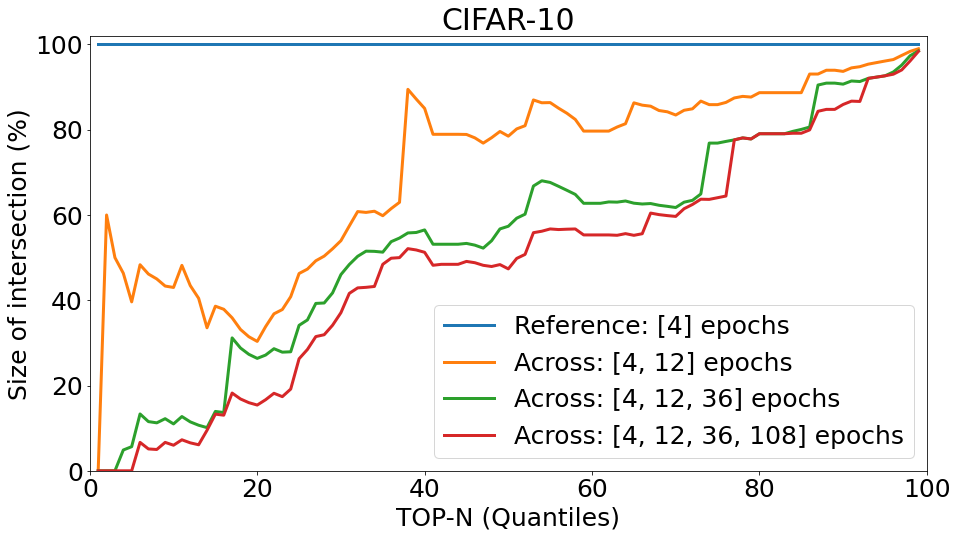

In [21]:
title = 'CIFAR-10'
plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(15,8))
plt.ylim(0, 102) #len(mean_perf_half))
plt.xlim(0, 100)

plt.plot(range(1, 100), [s[0] for s in size_inter_cifar10_top], label = "Reference: [4] epochs", linewidth=3)
plt.plot(range(1, 100), [s[1] for s in size_inter_cifar10_top], label = "Across: [4, 12] epochs", linewidth=3)
plt.plot(range(1, 100), [s[2] for s in size_inter_cifar10_top], label = "Across: [4, 12, 36] epochs", linewidth=3)
plt.plot(range(1, 100), [s[3] for s in size_inter_cifar10_top], label = "Across: [4, 12, 36, 108] epochs", linewidth=3)


plt.title(label=title)
plt.legend(loc='lower right')
plt.xlabel('TOP-N (Quantiles)')
plt.ylabel('Size of intersection (%)')
plt.show()

### Relative Bottom-N%

In [22]:
relative = True
size_inter_cifar10_bottom_rel = []
total_size = N_samples

for N in range(1, 100): # + 1):
    #print(N)
    top_n_r_04 = bottom_quantile_n(all_data_4_cf10, N=N, key='test_accuracy', cifar10=True)
    top_n_r_12 = bottom_quantile_n(all_data_12_cf10, N=N, key='test_accuracy', cifar10=True)
    top_n_r_36 = bottom_quantile_n(all_data_36_cf10, N=N, key='test_accuracy', cifar10=True)
    top_n_r_108 = bottom_quantile_n(all_data_108_cf10, N=N, key='test_accuracy', cifar10=True)

    top_n_r_4_models = [(m4, o4) for (m4, o4, _) in top_n_r_04]

    cross_4_12 = []
    cross_4_12_36 = []
    cross_all = []
    
    model_min12 = top_n_r_12[0]
    model_max12 = top_n_r_12[len(top_n_r_12)-1]
    
    min_ri_test_acc12 = min(model_min12[2]['test_accuracy'], model_max12[2]['test_accuracy'])
    max_ri_test_acc12 = max(model_min12[2]['test_accuracy'], model_max12[2]['test_accuracy'])

    for duo_i in top_n_r_04:
        
        cell = api.ModelSpec(
          matrix= duo_i[0],
          # Operations at the vertices of the module, matches order of matrix.
          ops= duo_i[1])
        data = nasbench.query(cell, epochs=12)
        
        if data['test_accuracy'] >= min_ri_test_acc12 and data['test_accuracy'] <= max_ri_test_acc12:
            cross_4_12.append(duo_i)
        
    model_min36 = top_n_r_36[0]
    model_max36 = top_n_r_36[len(top_n_r_36)-1]

    min_ri_test_acc36 = min(model_min36[2]['test_accuracy'], model_max36[2]['test_accuracy'])
    max_ri_test_acc36 = max(model_min36[2]['test_accuracy'], model_max36[2]['test_accuracy'])
        
    for duo_i in cross_4_12:
        
        cell = api.ModelSpec(
          matrix= duo_i[0],
          # Operations at the vertices of the module, matches order of matrix.
          ops= duo_i[1])
        data = nasbench.query(cell, epochs=36)
        
        if data['test_accuracy'] >= min_ri_test_acc36 and data['test_accuracy'] <= max_ri_test_acc36:
            cross_4_12_36.append(duo_i)
            
    model_min108 = top_n_r_108[0]
    model_max108 = top_n_r_108[len(top_n_r_108)-1]

    min_ri_test_acc108 = min(model_min108[2]['test_accuracy'], model_max108[2]['test_accuracy'])
    max_ri_test_acc108 = max(model_min108[2]['test_accuracy'], model_max108[2]['test_accuracy'])
    
    for duo_i in cross_4_12_36:
        
        cell = api.ModelSpec(
          matrix= duo_i[0],
          # Operations at the vertices of the module, matches order of matrix.
          ops= duo_i[1])
        data = nasbench.query(cell, epochs=108)
        
        if data['test_accuracy'] >= min_ri_test_acc108 and data['test_accuracy'] <= max_ri_test_acc108:
            cross_all.append(duo_i)
            
    if relative:
        len_top_4 = len(top_n_r_04)
        #print(N, len(top_n_r_04))
        #assert len_top_4 == N  * 10
    else:
        len_top_4 = total_size

    l0, l1, l2, l3 = len(top_n_r_04) / len_top_4, len(cross_4_12)/len_top_4, len(cross_4_12_36)/len_top_4, len(cross_all)/len_top_4
    size_inter_cifar10_bottom_rel.append((l0 * 100, l1 * 100, l2 * 100, l3 * 100))

    


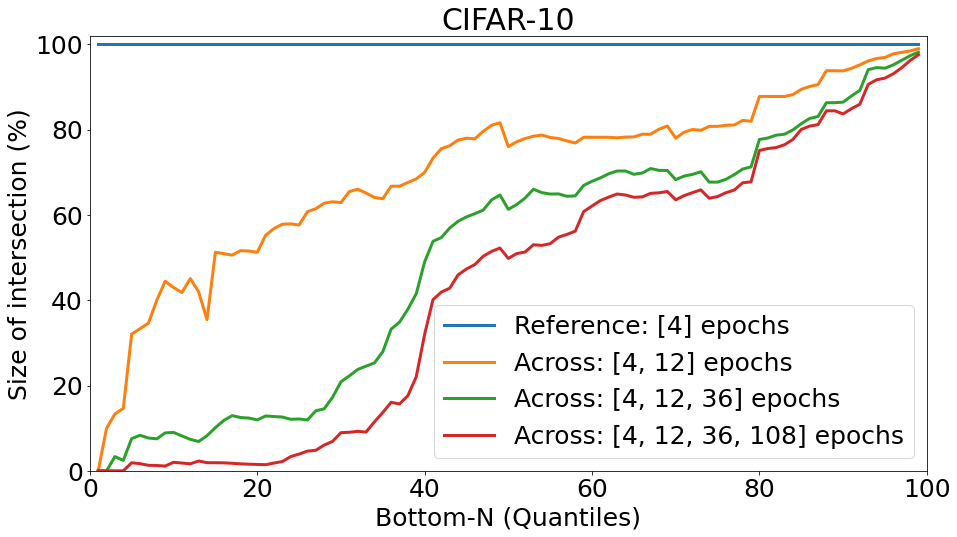

In [23]:
title = 'CIFAR-10'
plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(15,8))
plt.ylim(0, 102) #len(mean_perf_half))
plt.xlim(0, 100)

plt.plot(range(1, 100), [s[0] for s in size_inter_cifar10_bottom_rel], label = "Reference: [4] epochs", linewidth=3)
plt.plot(range(1, 100), [s[1] for s in size_inter_cifar10_bottom_rel], label = "Across: [4, 12] epochs", linewidth=3)
plt.plot(range(1, 100), [s[2] for s in size_inter_cifar10_bottom_rel], label = "Across: [4, 12, 36] epochs", linewidth=3)
plt.plot(range(1, 100), [s[3] for s in size_inter_cifar10_bottom_rel], label = "Across: [4, 12, 36, 108] epochs", linewidth=3)


plt.title(label=title)
plt.legend(loc='lower right')
plt.xlabel('Bottom-N (Quantiles)')
plt.ylabel('Size of intersection (%)')
plt.show()

In [24]:
N_bottom_size = 25
ref_bottom_25_c10 = [s[0] for s in size_inter_cifar10_bottom_rel][:N_top_size]
np.min(ref_bottom_25_c10), np.max(ref_bottom_25_c10), np.sum(ref_bottom_25_c10)/ (100 * N_bottom_size)

(100.0, 100.0, 1.0)

In [25]:
bottom_25_c10_list = [s[3] for s in size_inter_cifar10_bottom_rel][:N_top_size]

bottom_25_c10 = bottom_25_c10_list[len(bottom_25_c10_list)-1]
auc_bottom_25_c10 = np.sum(bottom_25_c10_list)/ (100 * N_bottom_size)

bottom_25_c10, auc_bottom_25_c10


(3.9215686274509802, 0.015885873721079632)